In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/sriji/MachineLearning/DemoDatasets/Lesson 4 Practice/insurance2.csv')

In [3]:
data.shape

(1338, 8)

In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [10]:
data.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

In [11]:
data.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [12]:
data.insuranceclaim.unique()

array([1, 0], dtype=int64)

In [13]:
data.insuranceclaim.value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [14]:
data.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [18]:
data_f = data.drop(['charges'],axis=1)

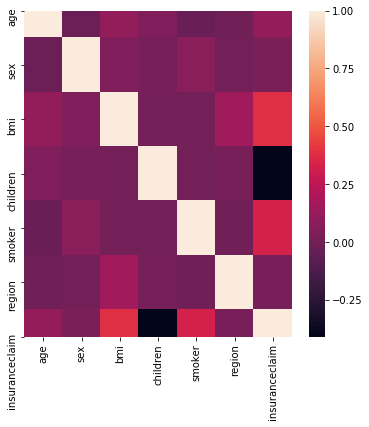

In [19]:
import seaborn as sns

plt.figure(figsize=(6,6))

sns.heatmap(data_f.corr())

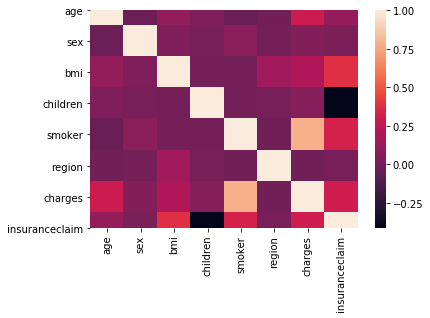

In [21]:
sns.heatmap(data.corr())

from the correlation heatmap we infer that,

1) age sex and region doesn't correlate much to the insurance claim

2) bmi and smoker and charges are positively correlated to the insurance claim

3) children is negatively correlated to insurance claim

In [23]:
X = data[['bmi','children','smoker','charges']]

y = data['insuranceclaim']

In [24]:
print(X.columns)

print(X.shape)
print(y.shape)

Index(['bmi', 'children', 'smoker', 'charges'], dtype='object')
(1338, 4)
(1338,)


In [25]:
y.unique()

array([1, 0], dtype=int64)

# the target variable is catergorical, hence use logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import classification_report as cr, confusion_matrix as cm

In [29]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

In [30]:
logreg = LogisticRegression()

In [31]:
logreg.fit(X_train,y_train)

D:\Software-Installation\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = logreg.predict(X_test)

In [33]:
print("Classification Report")

print(cr(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       103
           1       0.83      0.92      0.87       165

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [34]:
print("Confusion Matrix")

print(cm(y_test,y_pred))

Confusion Matrix
[[ 71  32]
 [ 13 152]]
